In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = "Arial"
import numpy as np
import matplotlib.pyplot as plt
from facilities import store_object, retrieve_object
from dPCA import dPCA
import pdb
import os



Bad key "legend.title_fontsize" on line 22 in
/Users/michael/.matplotlib/stylelib/notebook.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
dirpath = '/Users/michael/Documents/GitHub/multi-area-cleaned/'
loadpath_data = dirpath + 'sims/revision/exemplar_new/scratch_data/'
savepath_figs = dirpath + 'sims/revision/exemplar_new/figs/'
savepath = dirpath + 'sims/revision/exemplar_new/scratch_data/'
modelpath = dirpath + 'examples/models/cb_analyze_fixed-cb.py'

In [3]:
import sys
import subprocess
import numpy as np
import os
import cPickle as pkl
import matplotlib.pyplot as plt
import pdb
from pycog.trialRNN import PSTH
# clear output
from IPython.display import clear_output
clear_output()

## Plots / Outputs

In [8]:
def print_data(logged_data):
    for k in sorted(logged_data.iterkeys()):
        mean_data = np.mean(logged_data[k])
        std_data = np.std(logged_data[k])
        print ('{}: mean {:.2f}, std {:.2f}'.format(k, mean_data, std_data))


In [6]:
# noise_scale = 0.2
for noise_scale in [0.1, 0.2, 0.3, 0.5, 1]: #, 0.3, 0.5, 1]: # 0.1 0.2 0.3
    nt = 5
    n_monte = 5 
#     fname_log = 'logs/computational_advantage_noise{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
#     fname_log = 'logs/computational_advantage_relativeNoise{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname_log = 'logs/nov3/computational_advantage_relativeNoiseNonZero{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)

    fname = dirpath + fname_log
    logged_data = np.load(fname)
    print('#############################################################################')
    print('### filename is: {} '.format(fname_log))
    print_data(logged_data)

#############################################################################
### filename is: logs/nov3/computational_advantage_relativeNoiseNonZero0.1_nt5_nmonte5.npz 
dale_1a_no_perturb_perf: mean 97.59, std 0.79
dale_1a_perturb_perf: mean 97.61, std 0.82
dale_2a_no_perturb_perf: mean 95.98, std 2.92
dale_2a_perturb_perf: mean 95.91, std 2.96
dale_no_perturb_perf: mean 98.30, std 2.42
dale_perturb_perf: mean 98.27, std 2.34
ffi_no_perturb_perf: mean 97.95, std 2.43
ffi_perturb_perf: mean 97.88, std 2.45
nodale_no_perturb_perf: mean 99.46, std 0.31
nodale_perturb_perf: mean 99.43, std 0.40
#############################################################################
### filename is: logs/nov3/computational_advantage_relativeNoiseNonZero0.2_nt5_nmonte5.npz 
dale_1a_no_perturb_perf: mean 97.59, std 0.79
dale_1a_perturb_perf: mean 97.62, std 0.91
dale_2a_no_perturb_perf: mean 95.98, std 2.92
dale_2a_perturb_perf: mean 95.84, std 2.99
dale_no_perturb_perf: mean 98.30, std 2.42
dale_pertu

### Generate plots

In [41]:
def get_mean_std_monte(data, nmonte=1):
    # data has shape (80,) each 10 correspond to one monte 
    new_data = [data[n:n+nmonte] for n in range(len(data) // nmonte)]
    return new_data

In [42]:
def append_data(logged_data):
    temp_result_list = {}
    std_result_list = {}
    for k in sorted(logged_data.iterkeys()):
        mc_mean_data = get_mean_std_monte(logged_data[k]) # Averaging across MC noise
        mean_data_seeds = np.mean(mc_mean_data)
        temp_result_list[k] = mean_data_seeds
        std_result_list[k] = np.std(mc_mean_data) / np.sqrt(len(mc_mean_data))

    return temp_result_list, std_result_list

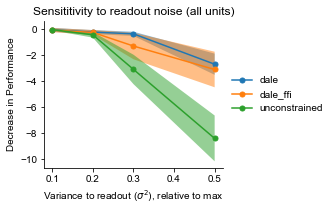

In [61]:
# noise_scale = 0.2
results_list = {}
std_results_list = {}
for noise_scale in [0.1, 0.2, 0.3, 0.5]: #, 1]: #, 1]: #, 0.3, 0.5, 1]: # 0.1 0.2 0.3
    nt = 20
    n_monte = 10
    fname_log = 'logs/computational_advantage_relativeNoise{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    #     fname_log = 'logs/computational_advantage_relativeNoiseNonzero{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname = dirpath + fname_log
    logged_data = np.load(fname)
    mean_list, std_list = append_data(logged_data)
    results_list[noise_scale] = mean_list
    std_results_list[noise_scale] = std_list

results_perturb = [] # np.zeros((5, 6))
results_no_perturb = []
std_perturb = []
conds_perturbed = ['dale_perturb_perf', 'ffi_perturb_perf', 'nodale_perturb_perf']
conds_no_perturbed = ['dale_no_perturb_perf', 'ffi_no_perturb_perf', 'nodale_no_perturb_perf']

for noise in (sorted(results_list)):
    results_new_temp = [results_list[noise][cond] for cond in conds_no_perturbed]
    results_no_perturb.append(results_new_temp)
    
for noise in (sorted(results_list)):
    results_new_temp = [results_list[noise][cond] for cond in conds_perturbed]
    results_perturb.append(results_new_temp)
    std_temp = [std_results_list[noise][cond] for cond in conds_perturbed]
    std_perturb.append(std_temp)

# Make plot
plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
results_new = np.array(results_perturb) - np.array(results_no_perturb)
yerr = np.array(std_perturb)
labels = ['dale', 'dale_ffi', 'unconstrained']
for j, label in enumerate(labels):
    plt.plot(sorted(results_list), results_new[:, j], marker='o', markersize=5, label=label)
    plt.fill_between(sorted(results_list), results_new[:, j] - yerr[:, j],
                     results_new[:, j] + yerr[:, j], alpha = 0.5)
plt.xlabel('Variance to readout ($\sigma^2$), relative to max')
plt.ylabel('Decrease in Performance')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.title('Sensititivity to readout noise (all units)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/comp_advantage_allunitsnoise_dec8.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')    

# print(results_list)
# print(std_list)

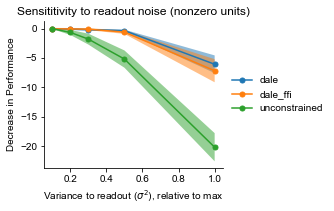

In [59]:
results_list = {}
std_results_list = {}
for noise_scale in [0.1, 0.2, 0.3, 0.5, 1]: #, 1]: #, 0.3, 0.5, 1]: # 0.1 0.2 0.3
    nt = 20
    n_monte = 10
#     fname_log = 'logs/computational_advantage_relativeNoise{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname_log = 'logs/computational_advantage_relativeNoiseNonzero{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname = dirpath + fname_log
    logged_data = np.load(fname)
    mean_list, std_list = append_data(logged_data)
    results_list[noise_scale] = mean_list
    std_results_list[noise_scale] = std_list

results_perturb = [] # np.zeros((5, 6))
results_no_perturb = []
std_perturb = []
conds_perturbed = ['dale_perturb_perf', 'ffi_perturb_perf', 'nodale_perturb_perf']
conds_no_perturbed = ['dale_no_perturb_perf', 'ffi_no_perturb_perf', 'nodale_no_perturb_perf']

for noise in (sorted(results_list)):
    results_new_temp = [results_list[noise][cond] for cond in conds_no_perturbed]
    results_no_perturb.append(results_new_temp)
    
for noise in (sorted(results_list)):
    results_new_temp = [results_list[noise][cond] for cond in conds_perturbed]
    results_perturb.append(results_new_temp)
    std_temp = [std_results_list[noise][cond] for cond in conds_perturbed]
    std_perturb.append(std_temp)

# Make plot
plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
results_new = np.array(results_perturb) - np.array(results_no_perturb)
yerr = np.array(std_perturb)
labels = ['dale', 'dale_ffi', 'unconstrained']
for j, label in enumerate(labels):
    plt.plot(sorted(results_list), results_new[:, j], marker='o', markersize=5, label=label)
    plt.fill_between(sorted(results_list), results_new[:, j] - yerr[:, j],
                     results_new[:, j] + yerr[:, j], alpha = 0.5)
plt.xlabel('Variance to readout ($\sigma^2$), relative to max')
plt.ylabel('Decrease in Performance')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.title('Sensititivity to readout noise (nonzero units)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/comp_advantage_nonzeroUnitsNoise_dec8.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')    

# print(results_list)
# print(std_list)

# Intra Area DPCA overlap

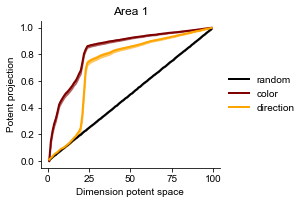

In [18]:
# Figure 7a - layer 1 to 1

dirpath = '/Users/michael/Documents/GitHub/multi-area-cleaned/'
loadpath = 'logs/dpca_intra_area_nov6/'
layer2c_store = np.load(dirpath + loadpath + 'null_potent_dpca_a11.npy')

yerr=np.std(layer2c_store, axis=(0, 1)).T / np.sqrt(layer2c_store.shape[0] * layer2c_store.shape[1])
x = np.arange(1,100)
y1 = np.mean(layer2c_store, axis=(0, 1)).T[:, 1][1:]
y2 = np.mean(layer2c_store, axis=(0, 1)).T[:, 0][1:]
y3 = np.mean(layer2c_store, axis=(0, 1)).T[:, 2][1:]
yerr1 =yerr[1:, 1]
yerr2 =yerr[1:, 0]
yerr3 =yerr[1:, 2]

plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
plt.plot(x, y1, linewidth=2, color='black')
plt.plot(x, y2, linewidth=2, color='maroon')
plt.plot(x, y3, linewidth=2, color='orange')
plt.fill_between(x, y1-yerr1, y1+yerr1, alpha = 0.5, color='black')
plt.fill_between(x, y2-yerr2, y2+yerr2, alpha = 0.5, color='maroon')
plt.fill_between(x, y3-yerr3, y3+yerr3, alpha = 0.5, color='orange')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title('Area 1')
plt.xlabel('Dimension potent space')
plt.ylabel('Potent projection')
plt.legend(('random','color', 'direction'), loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/dpca_intra_area1.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')

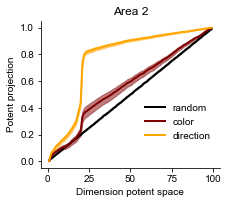

In [17]:
# Figure 7a - layer 1 to 1

dirpath = '/Users/michael/Documents/GitHub/multi-area-cleaned/'
loadpath = 'logs/dpca_intra_area_nov6/'
layer2c_store = np.load(dirpath + loadpath + 'null_potent_dpca_a22.npy')

yerr=np.std(layer2c_store, axis=(0, 1)).T / np.sqrt(layer2c_store.shape[0] * layer2c_store.shape[1])
x = np.arange(1,100)
y1 = np.mean(layer2c_store, axis=(0, 1)).T[:, 1][1:]
y2 = np.mean(layer2c_store, axis=(0, 1)).T[:, 0][1:]
y3 = np.mean(layer2c_store, axis=(0, 1)).T[:, 2][1:]
yerr1 =yerr[1:, 1]
yerr2 =yerr[1:, 0]
yerr3 =yerr[1:, 2]

plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
plt.plot(x, y1, linewidth=2, color='black')
plt.plot(x, y2, linewidth=2, color='maroon')
plt.plot(x, y3, linewidth=2, color='orange')
plt.fill_between(x, y1-yerr1, y1+yerr1, alpha = 0.5, color='black')
plt.fill_between(x, y2-yerr2, y2+yerr2, alpha = 0.5, color='maroon')
plt.fill_between(x, y3-yerr3, y3+yerr3, alpha = 0.5, color='orange')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title('Area 2')
plt.xlabel('Dimension potent space')
plt.ylabel('Potent projection')
# plt.legend(('random','color', 'direction'), loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.legend(('random','color', 'direction'), bbox_to_anchor=(1, 0.5), frameon=False)
savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/dpca_intra_area2.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')

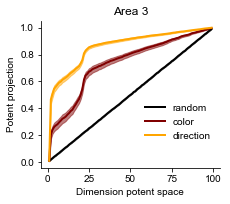

In [16]:
# Figure 7a - layer 1 to 1

dirpath = '/Users/michael/Documents/GitHub/multi-area-cleaned/'
loadpath = 'logs/dpca_intra_area_nov6/'
layer2c_store = np.load(dirpath + loadpath + 'null_potent_dpca_a33.npy')

yerr=np.std(layer2c_store, axis=(0, 1)).T / np.sqrt(layer2c_store.shape[0] * layer2c_store.shape[1])
x = np.arange(1,100)
y1 = np.mean(layer2c_store, axis=(0, 1)).T[:, 1][1:]
y2 = np.mean(layer2c_store, axis=(0, 1)).T[:, 0][1:]
y3 = np.mean(layer2c_store, axis=(0, 1)).T[:, 2][1:]
yerr1 =yerr[1:, 1]
yerr2 =yerr[1:, 0]
yerr3 =yerr[1:, 2]

plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
plt.plot(x, y1, linewidth=2, color='black')
plt.plot(x, y2, linewidth=2, color='maroon')
plt.plot(x, y3, linewidth=2, color='orange')
plt.fill_between(x, y1-yerr1, y1+yerr1, alpha = 0.5, color='black')
plt.fill_between(x, y2-yerr2, y2+yerr2, alpha = 0.5, color='maroon')
plt.fill_between(x, y3-yerr3, y3+yerr3, alpha = 0.5, color='orange')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title('Area 3')
plt.xlabel('Dimension potent space')
plt.ylabel('Potent projection')
# plt.legend(('random','color', 'direction'), loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.legend(('random','color', 'direction'), bbox_to_anchor=(1, 0.5), frameon=False)
savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/dpca_intra_area3.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')

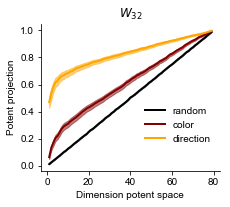

In [20]:
# Figure 7b - layer 2 to 3

loadpath_exemplar_dpca = "/Users/michael/Documents/GitHub/multi-area-cleaned/" + 'sims/revision/exemplar_new/scratch_data_dpca/'
loadpath = loadpath_exemplar_dpca
layer2c_store = np.load(loadpath + 'null_potent_dpca_l2.npy')

yerr=np.std(layer2c_store, axis=(0, 1)).T / np.sqrt(layer2c_store.shape[0] * layer2c_store.shape[1])
x = np.arange(1,80)
y1 = np.mean(layer2c_store, axis=(0, 1)).T[:, 1][1:]
y2 = np.mean(layer2c_store, axis=(0, 1)).T[:, 0][1:]
y3 = np.mean(layer2c_store, axis=(0, 1)).T[:, 2][1:]
yerr1 =yerr[1:, 1]
yerr2 =yerr[1:, 0]
yerr3 =yerr[1:, 2]

plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
plt.plot(x, y1, linewidth=2, color='black')
plt.plot(x, y2, linewidth=2, color='maroon')
plt.plot(x, y3, linewidth=2, color='orange')
plt.fill_between(x, y1-yerr1, y1+yerr1, alpha = 0.5, color='black')
plt.fill_between(x, y2-yerr2, y2+yerr2, alpha = 0.5, color='maroon')
plt.fill_between(x, y3-yerr3, y3+yerr3, alpha = 0.5, color='orange')

plt.xlabel('Dimension potent space')
plt.ylabel('Potent projection')
plt.legend(('random','color', 'direction'), bbox_to_anchor=(1, 0.5), frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title(r'$W_{32}$')

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/dpca_inter_area_W23.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')

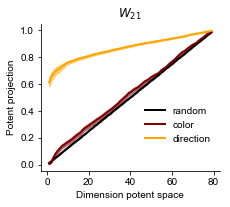

In [5]:

# Figure 7a - layer 1 to 2

loadpath_exemplar_dpca = "/Users/michael/Documents/GitHub/multi-area-cleaned/" + 'sims/revision/exemplar_new/scratch_data_dpca/'
loadpath = loadpath_exemplar_dpca
layer2c_store = np.load(loadpath + 'null_potent_dpca.npy')

yerr=np.std(layer2c_store, axis=(0, 1)).T / np.sqrt(layer2c_store.shape[0] * layer2c_store.shape[1])
x = np.arange(1,80)
y1 = np.mean(layer2c_store, axis=(0, 1)).T[:, 1][1:]
y2 = np.mean(layer2c_store, axis=(0, 1)).T[:, 0][1:]
y3 = np.mean(layer2c_store, axis=(0, 1)).T[:, 2][1:]
yerr1 =yerr[1:, 1]
yerr2 =yerr[1:, 0]
yerr3 =yerr[1:, 2]

plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
plt.plot(x, y1, linewidth=2, color='black')
plt.plot(x, y2, linewidth=2, color='maroon')
plt.plot(x, y3, linewidth=2, color='orange')
plt.fill_between(x, y1-yerr1, y1+yerr1, alpha = 0.5, color='black')
plt.fill_between(x, y2-yerr2, y2+yerr2, alpha = 0.5, color='maroon')
plt.fill_between(x, y3-yerr3, y3+yerr3, alpha = 0.5, color='orange')

plt.xlabel('Dimension potent space')
plt.ylabel('Potent projection')
plt.legend(('random','color', 'direction'), bbox_to_anchor=(1, 0.5), frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title(r'$W_{21}$')

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/dpca_inter_area_W12.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')

### No Dale from neurips

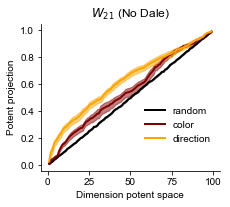

In [21]:
loadpath = '/Users/michael/Documents/GitHub/multi-area-cleaned/sims/neurips/'
layer2c_store = np.load(loadpath + 'null_potent_dpca_nodale.npy')

yerr=np.std(layer2c_store, axis=(0)).T / np.sqrt(layer2c_store.shape[0])
x = np.arange(1,100)
y1 = np.mean(layer2c_store, axis=(0)).T[:, 1][1:]
y2 = np.mean(layer2c_store, axis=(0)).T[:, 0][1:]
y3 = np.mean(layer2c_store, axis=(0)).T[:, 2][1:]
yerr1 =yerr[1:, 1]
yerr2 =yerr[1:, 0]
yerr3 =yerr[1:, 2]


plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
plt.plot(x, y1, linewidth=2, color='black')
plt.plot(x, y2, linewidth=2, color='maroon')
plt.plot(x, y3, linewidth=2, color='orange')
plt.fill_between(x, y1-yerr1, y1+yerr1, alpha = 0.5, color='black')
plt.fill_between(x, y2-yerr2, y2+yerr2, alpha = 0.5, color='maroon')
plt.fill_between(x, y3-yerr3, y3+yerr3, alpha = 0.5, color='orange')

plt.xlabel('Dimension potent space')
plt.ylabel('Potent projection')
plt.legend(('random','color', 'direction'), bbox_to_anchor=(1, 0.5), frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title(r'$W_{21}$ (No Dale)')

# for legobj in leg.legendHandles:
#     legobj.set_linewidth(4.0)
savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/dpca_inter_area_W12_nodale.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')

In [13]:
dirpath = '/Users/michael/Documents/GitHub/multi-area-cleaned/'
loadpath = 'logs/dpca_intra_area_nov6/'
sing11 = np.load(dirpath + loadpath + 'sing_values_11.npy') # Can load sing_values_22.npy and sing_values_33.npy

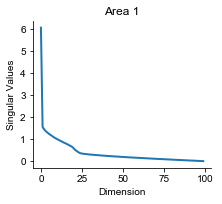

In [14]:
plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
plt.plot(np.mean(sing11, axis=(0, 1)), linewidth=2)
plt.xlabel('Dimension')
plt.ylabel('Singular Values')
plt.title('Area 1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/sing_values_area1.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')

In [19]:
dirpath = '/Users/michael/Documents/GitHub/multi-area-cleaned/'
loadpath = 'logs/dpca_inter_area_nov15/'
# loadpath = 'logs/dpca_inter_area_inhIncl_nov15/'
sing11 = np.load(dirpath + loadpath + 'sing_values_23.npy') # Can load sing_values_22.npy and sing_values_33.npy

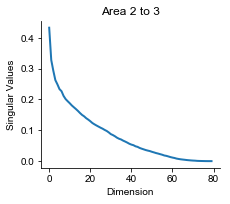

In [20]:
plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
plt.plot(np.mean(sing11, axis=(0, 1)), linewidth=2)
plt.xlabel('Dimension')
plt.ylabel('Singular Values')
plt.title('Area 2 to 3')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/sing_values_area23.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')

## Discriminability Distance

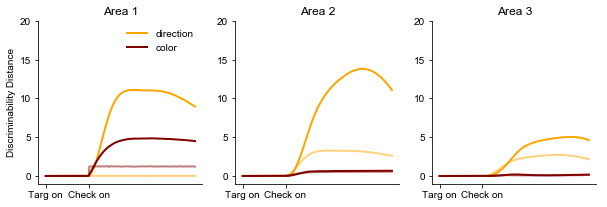

In [23]:
# Figure 5a - Activity difference between decisions
dirpath = '/Users/michael/Documents/GitHub/multi-area-cleaned/'
loadpath_exemplar_data = dirpath + 'sims/revision/exemplar_new/scratch_data/'
psths = retrieve_object('psths_dir_scol.p', loadpath_exemplar_data)
rnn = retrieve_object('rnn.p', loadpath_exemplar_data)
wrec_activity = False # set to true if we want WREC * activity (might be more meaningful comparison)

Win = rnn.Win
Wrec = rnn.Wrec
W12 = Wrec[80:160, 0:80]
W23 = Wrec[160:240, 80:160]
idx1 = np.hstack((np.arange(80), np.arange(240, 260)))
idx2 = np.hstack((np.arange(80, 160), np.arange(260, 280)))
idx3 = np.hstack((np.arange(160, 240), np.arange(280, 300)))


ra0 = psths[0]['psth']
ra1 = psths[1]['psth']
ra2 = psths[2]['psth']
ra3 = psths[3]['psth']

if wrec_activity:
    ra0 = Wrec.dot(ra0)
    ra1 = Wrec.dot(ra1)
    ra2 = Wrec.dot(ra2)
    ra3 = Wrec.dot(ra3)

# color 
inp3 = psths[3]['u_psth']
inp2 = psths[2]['u_psth']
inp1 = psths[1]['u_psth']
inp0 = psths[0]['u_psth']
diff_inp = (inp3-inp2 + inp1-inp0)/2
diffc = (ra3 - ra2 + ra1 - ra0)/2 # left green - left red + right green - right red

# diff_inp = inp3-inp2
# diffc = ra1 - ra0
norm1c = np.linalg.norm(diffc[idx1], axis=0)
norm2c = np.linalg.norm(diffc[idx2], axis=0)
norm3c = np.linalg.norm(diffc[idx3], axis=0)
proj2c = np.linalg.norm(W12.dot(diffc[idx1[:80]]), axis=0)
proj3c = np.linalg.norm(W23.dot(diffc[idx2[:80]]), axis=0)
proj1c = np.linalg.norm(Win.dot(diff_inp), axis=0)

# direction
# inp3 = psth.psths[1]['u_psth']
# inp2 = psth.psths[3]['u_psth']
diff_inp = (inp1-inp3 + inp0 -inp2)/2
diffd = (ra1 - ra3 + ra0 - ra2)/2 # right green - left green + right red - left red
norm1 = np.linalg.norm(diffd[idx1], axis=0)
norm2 = np.linalg.norm(diffd[idx2], axis=0)
norm3 = np.linalg.norm(diffd[idx3], axis=0)
proj2 = np.linalg.norm(W12.dot(diffd[idx1[:80]]), axis=0)
proj3 = np.linalg.norm(W23.dot(diffd[idx2[:80]]), axis=0)
proj1 = np.linalg.norm(Win.dot(diff_inp), axis=0)

fig, axs = plt.subplots(1,3, figsize=(10,3))
# fig.suptitle('Vertically stacked subplots')
idx_plot = (np.arange(90, 300))
axs[0].plot(norm1[idx_plot], 'orange', linewidth = 2, label='direction')
axs[0].plot(proj1[idx_plot], 'orange', alpha = 0.5, linewidth = 2)
axs[1].plot(norm2[idx_plot], 'orange', linewidth = 2)
axs[1].plot(proj2[idx_plot], 'orange', alpha = 0.5, linewidth = 2)
axs[2].plot(norm3[idx_plot], 'orange', linewidth = 2)
axs[2].plot(proj3[idx_plot], 'orange', alpha = 0.5, linewidth = 2)
axs[0].plot(norm1c[idx_plot], 'maroon', linewidth = 2, label='color')
axs[0].plot(proj1c[idx_plot], 'maroon', alpha = 0.5, linewidth = 2)
axs[1].plot(norm2c[idx_plot], 'maroon', linewidth = 2)
axs[1].plot(proj2c[idx_plot], 'maroon', alpha = 0.5, linewidth = 2)
axs[2].plot(norm3c[idx_plot], 'maroon', linewidth = 2)
axs[2].plot(proj3c[idx_plot], 'maroon', alpha = 0.5, linewidth = 2)
axs[0].set_xticks([0, 60]) 
axs[1].set_xticks([0, 60]) 
axs[2].set_xticks([0, 60]) 
axs[0].set_title('Area 1')
axs[1].set_title('Area 2')
axs[2].set_title('Area 3')
axs[0].set_xticklabels(['Targ on', 'Check on'])
axs[1].set_xticklabels(['Targ on', 'Check on'])
axs[2].set_xticklabels(['Targ on', 'Check on'])
axs[2].set_ylim(-1, 20)
axs[1].set_ylim(-1, 20)
axs[0].set_ylim(-1, 20)
axs[0].set_ylabel('Discriminability Distance')
for i in range(3):
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)
axs[0].legend(frameon=False)

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/discriminability.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')

In [20]:
print('Color')
gain_range = np.arange(170, 270)
print(np.mean(norm1c[gain_range])/np.mean(proj1c[gain_range]))
print(np.mean(norm2c[gain_range])/np.mean(proj2c[gain_range]))
print(np.mean(norm3c[gain_range])/np.mean(proj3c[gain_range]))

print('Direction')
gain_range = np.arange(170, 270)
print(np.mean(norm1[gain_range])/np.mean(proj1[gain_range]))
print(np.mean(norm2[gain_range])/np.mean(proj2[gain_range]))
print(np.mean(norm3[gain_range])/np.mean(proj3[gain_range]))

print('Color amplification between layers')
col_12 = np.mean(proj2c[gain_range])/np.mean(norm1c[gain_range])
col_23 = np.mean(proj3c[gain_range])/np.mean(norm2c[gain_range])
print(col_12)
print(col_23)

print('Direction amplification between layers')
dir_12 = np.mean(proj2[gain_range])/np.mean(norm1[gain_range])
dir_23 = np.mean(proj3[gain_range])/np.mean(norm2[gain_range])
print(dir_12)
print(dir_23)

print('Relative amplification: direction/color')
print(dir_12/col_12)
print(dir_23/col_23)

Color
3.706055544922908
1.2029540651306698
1.5093293406552704
Direction
498.0172879645514
3.4797492055957986
1.5974786438385162
Color amplification between layers
0.11180916972231744
0.13487402273474255
Direction amplification between layers
0.29789051783626036
0.21213086653733118
Relative amplification: direction/color
2.6642762715802597
1.572807440870434


## dPCA Variances

In [16]:
loadpath_dpca = '/Users/michael/Documents/GitHub/multi-area-cleaned/logs/scratch_data_dpca_nov18/'
loadpath = loadpath_dpca
dvar = np.load(loadpath + 'dpca_layers_direction.npy')
cvar = np.load(loadpath + 'dpca_layers_color.npy')
xvar = np.load(loadpath + 'dpca_layers_context.npy')
tvar = np.load(loadpath + 'dpca_layers_time.npy')

print('Color Variance Across Areas {}'.format(np.mean(cvar, axis=0)))
print('Context Variance Across Areas {}'.format(np.mean(xvar, axis=0)))
print('Direction Variance Across Areas {}'.format(np.mean(dvar, axis=0)))
print('Time Variance Across Areas {}'.format(np.mean(tvar, axis=0)))

Color Variance Across Areas [0.05575664 0.00134424 0.00073746]
Context Variance Across Areas [0.13293832 0.00233587 0.00098981]
Direction Variance Across Areas [0.30855629 0.18159049 0.4849864 ]
Time Variance Across Areas [0.46690837 0.78942218 0.49355828]


## Color Information Scatter Plot for Feedforward Inh

In [4]:
def get_mean_std_monte(data, nmonte=1):
    # data has shape (80,) each 10 correspond to one monte 
    new_data = [data[n:n+nmonte] for n in range(len(data) // nmonte)]
    return new_data

def extract_data(data):
    dale_no_perturb_perf = data['dale_no_perturb_perf']
    dale_perturb_perf = data['dale_perturb_perf']
    nodale_no_perturb_perf = data['nodale_no_perturb_perf']
    nodale_perturb_perf = data['nodale_perturb_perf']
    ffi_no_perturb_perf = data['ffi_no_perturb_perf']
    ffi_perturb_perf = data['ffi_perturb_perf']
    return dale_no_perturb_perf, dale_perturb_perf, nodale_no_perturb_perf, nodale_perturb_perf, ffi_no_perturb_perf, ffi_perturb_perf

In [6]:
loadpath_exemplar_mi = dirpath + "sims/revision/exemplar_new/scratch_data_mi/"
basepath = '2020-04-10_cb_simple_3areas_correctdale_ffi='
param = '0p1'
mi_color = np.load(loadpath_exemplar_mi + basepath + param + '_color.npy')

In [26]:
for noise_scale in [0.3, 0.5, 1]:
    nt = 20
    n_monte = 10 
    fname_log = 'logs/computational_advantage_relativeNoise{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
#     fname_log = 'logs/computational_advantage_noise{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname = dirpath + fname_log
    logged_data = np.load(fname)
    _, _, _, _, ffi_np, ffi_p = extract_data(logged_data)
    ffi_diff_mean = np.mean(get_mean_std_monte(ffi_p - ffi_np, nmonte=10), axis=1)

    # Mi Color

    plt.figure(figsize=(3.2,2.7))
    ax = plt.gca()
    plt.scatter(mi_color, ffi_diff_mean)
    plt.xlabel('Color Information')
    plt.ylabel('Decrease in Accuracy')
    plt.title(r'FF inh. ($\sigma^2 = {}$)'.format(noise_scale))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/color_inf_decAcc_scatter_noise{}.pdf'.format(noise_scale)
    plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')
    plt.close()

## Plots for output weights (also in revision_main)

In [34]:
loadpath_output = dirpath + "sims/revision/scratch_data_output/"

Overlap metric:
0.7764308771869783


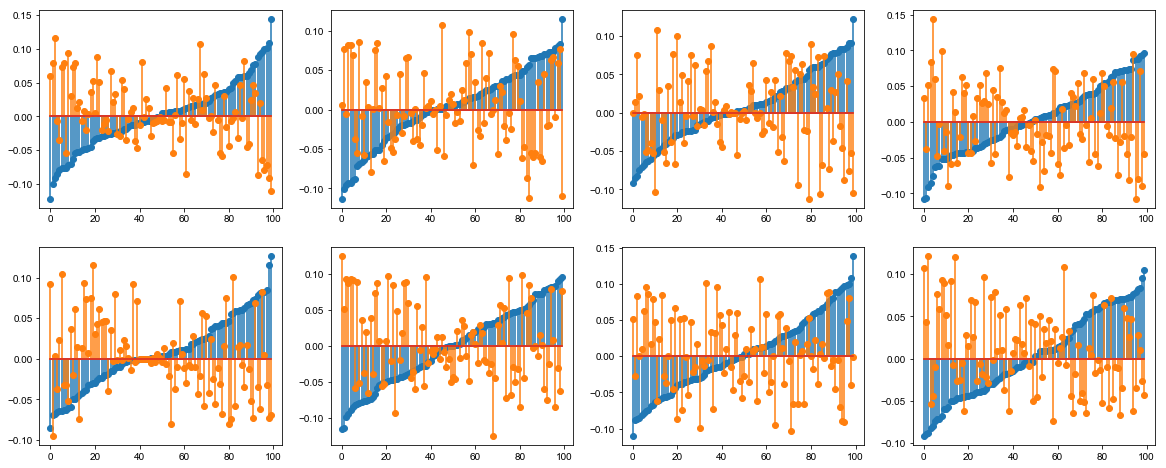

In [35]:
# nodale
basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 200:300]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 200:300])
    axs[i].stem(rnn.Wout[1, 200:300][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

Overlap metric:
0.0027019680693676773


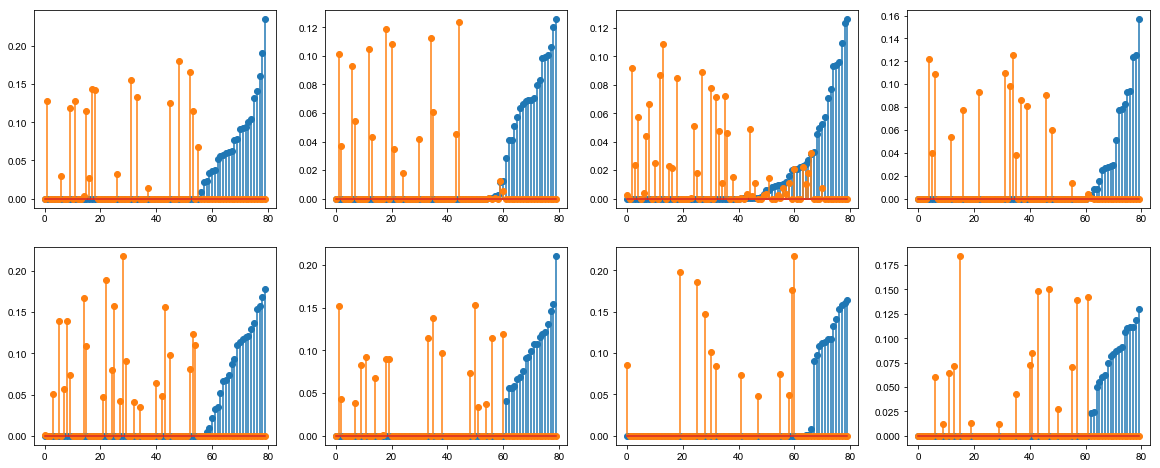

In [36]:
# Dale law - 3area RNN

basepath = '2020-04-10_cb_simple_3areas_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 160:240]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 160:240])
    axs[i].stem(rnn.Wout[1, 160:240][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

Overlap metric:
0.29466659038751203


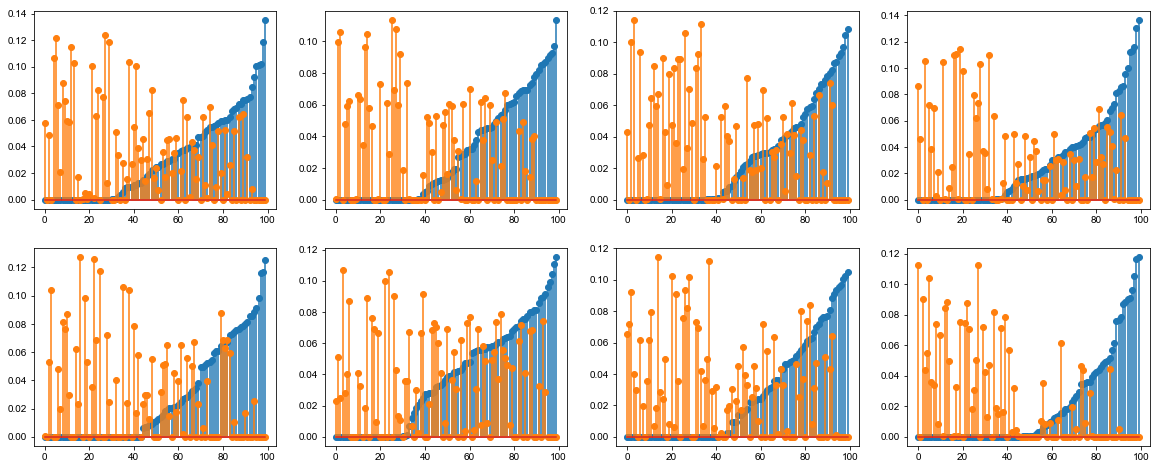

In [37]:
# nodale, with constrain on output weights
basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_outputpos_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 200:300]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 200:300])
    axs[i].stem(rnn.Wout[1, 200:300][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

Overlap metric:
0.003987508657529356


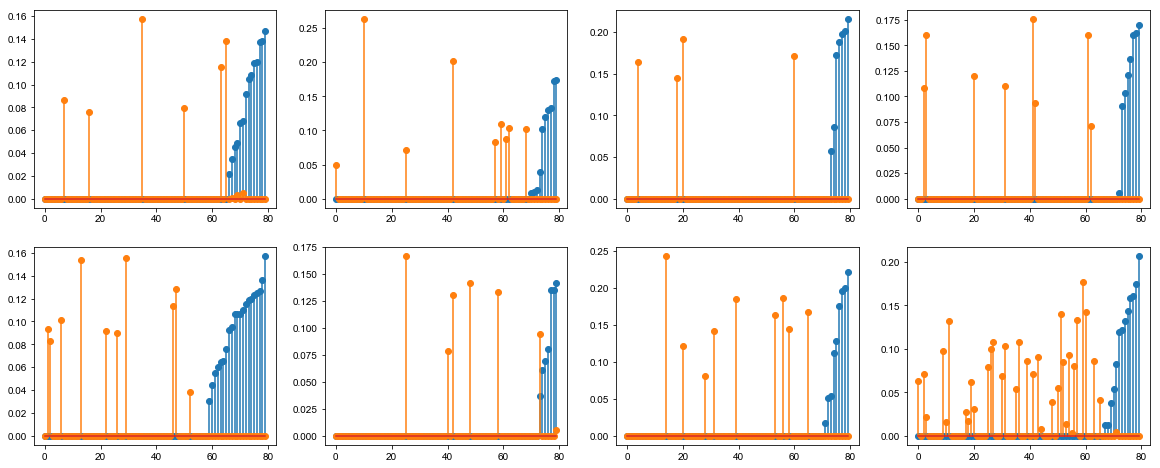

In [38]:
# dale FFI 0.1, with constrain on output weights
basepath = '2020-04-10_cb_simple_3areas_correctdale_ffi=0p1_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 160:240]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 160:240])
    axs[i].stem(rnn.Wout[1, 160:240][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

In [82]:
# print(rnn.Win)
# print(rnn.Wrec)
# print(rnn.Wout)

### One final plot (paper)

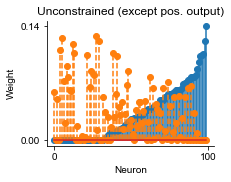

In [39]:
from matplotlib.ticker import FormatStrFormatter

basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_outputpos_seed='
i = 0
seed = i
rnn = retrieve_object(basepath + str(seed) + '_rnn.p', loadpath_output)
plt.figure(figsize=(3,2.3))
rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
plt.stem(np.sort(rnn.Wout[0, 200:300]), 'C0')
id_sort = np.argsort(rnn.Wout[0, 200:300])
plt.stem(rnn.Wout[1, 200:300][id_sort], 'C1--', markerfmt='C1o')
plt.xticks([0, 100])
plt.xlabel('Neuron')
plt.ylabel('Weight')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.yticks([0, np.max(rnn.Wout)])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Unconstrained (except pos. output)')

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/weights_nodale_outpos.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight') 

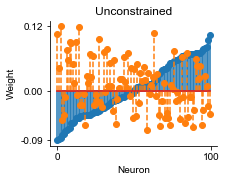

In [31]:
from matplotlib.ticker import FormatStrFormatter

basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_seed='
i = 7
seed = i
rnn = retrieve_object(basepath + str(seed) + '_rnn.p', loadpath_output)
plt.figure(figsize=(3,2.3))
rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
plt.stem(np.sort(rnn.Wout[0, 200:300]), 'C0')
id_sort = np.argsort(rnn.Wout[0, 200:300])
plt.stem(rnn.Wout[1, 200:300][id_sort], 'C1--', markerfmt='C1o')
plt.xticks([0, 100])
plt.xlabel('Neuron')
plt.ylabel('Weight')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.yticks([np.min(rnn.Wout) ,0, np.max(rnn.Wout)])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Unconstrained')

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/weights_nodale.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight') 

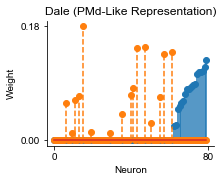

In [33]:
from matplotlib.ticker import FormatStrFormatter

basepath = '2020-04-10_cb_simple_3areas_seed='
i = 7
seed = i
rnn = retrieve_object(basepath + str(seed) + '_rnn.p', loadpath_output)
plt.figure(figsize=(3,2.3))
rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
plt.stem(np.sort(rnn.Wout[0, 160:240]), 'C0')
id_sort = np.argsort(rnn.Wout[0, 160:240])
plt.stem(rnn.Wout[1, 160:240][id_sort], 'C1--', markerfmt='C1o')
plt.xticks([0, 80])
plt.xlabel('Neuron')
plt.ylabel('Weight')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.yticks([0, np.max(rnn.Wout)])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Dale (PMd-Like Representation)')

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/weights_dale.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight') 

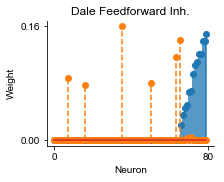

In [12]:
from matplotlib.ticker import FormatStrFormatter

basepath = '2020-04-10_cb_simple_3areas_correctdale_ffi=0p1_seed='
i = 0
seed = i
rnn = retrieve_object(basepath + str(seed) + '_rnn.p', loadpath_output)
plt.figure(figsize=(3,2.3))
rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
plt.stem(np.sort(rnn.Wout[0, 160:240]), 'C0')
id_sort = np.argsort(rnn.Wout[0, 160:240])
plt.stem(rnn.Wout[1, 160:240][id_sort], 'C1--', markerfmt='C1o')
plt.xticks([0, 80])
plt.xlabel('Neuron')
plt.ylabel('Weight')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.yticks([0, np.max(rnn.Wout)])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Dale Feedforward Inh.')

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/weights_dale_ffi.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight') 

## New perturbation to output weights (Development)

In [97]:
noise_scale = 0.1

In [98]:
vin = 0.10**2
var_in = np.array(((0, 0, 0, 0), (0,0,0,0), (0,0,vin,0), (0,0,0,vin)))#0.20**2
var_rec = 0.05**2
nt = 2
seed = 7

### Dale

In [99]:
rnnbase = dirpath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas/'
filename_pkl = '2020-04-10_cb_simple_3areas_seed={}.pkl'.format(seed)
np.random.seed(seed=seed)
psth_dale = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6)
Wout_temp = np.copy(psth_dale.rnn.Wout[:, 160:240])
Wout_temp = Wout_temp + np.random.normal(size=Wout_temp.shape) * noise_scale
Wout = np.zeros_like(psth_dale.rnn.Wout)
Wout[:, 160:240] = Wout_temp
psth_dale_new = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6, Wout=Wout)

[ pycog.rnn.RNN ] 16500 updates, best error = 0.20798652, spectral radius = 1.84214282
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.0
[ pycog.rnn.RNN ] 16500 updates, best error = 0.20798652, spectral radius = 1.84214282
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.0357142857143


In [100]:
print("Accuracy Before Perturbation: {:.2f}".format(psth_dale.eval_performance()))
print("Accuracy After Perturbation: {:.2f}".format(psth_dale_new.eval_performance()))

Accuracy Before Perturbation: 100.00
Accuracy After Perturbation: 96.43


In [108]:
Wout_temp = np.copy(psth_dale.rnn.Wout[:, 160:240])
print(np.mean(Wout_temp))
print(np.max(Wout_temp))

0.017301943
0.1842219


### NoDale

In [90]:
rnnbase = dirpath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas_nodale_ff=0p1/'
filename_pkl = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_seed={}.pkl'.format(seed)
np.random.seed(seed=seed)
psth_nodale = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6)
Wout_temp = np.copy(psth_nodale.rnn.Wout[:, 200:300])
Wout_temp = Wout_temp + np.random.normal(size=Wout_temp.shape) * noise_scale
Wout = np.zeros_like(psth_nodale.rnn.Wout)
Wout[:, 200:300] = Wout_temp
psth_nodale_new = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6, Wout=Wout)


[ pycog.rnn.RNN ] 4500 updates, best error = 0.20724680, spectral radius = 1.28292620
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.0
[ pycog.rnn.RNN ] 4500 updates, best error = 0.20724680, spectral radius = 1.28292620
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.178571428571


In [91]:
print("Accuracy Before Perturbation: {:.2f}".format(psth_nodale.eval_performance()))
print("Accuracy After Perturbation: {:.2f}".format(psth_nodale_new.eval_performance()))

Accuracy Before Perturbation: 100.00
Accuracy After Perturbation: 92.86


In [106]:
Wout_temp = np.copy(psth_nodale.rnn.Wout[:, 160:240])
print(np.max(Wout_temp))

0.119549796


### Feedforward Inhibition

In [92]:
rnnbase = dirpath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas_correctdale_ffi=0p1/'
filename_pkl = '2020-04-10_cb_simple_3areas_correctdale_ffi=0p1_seed={}.pkl'.format(seed)
np.random.seed(seed=seed)
psth_ffi = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6)
Wout_temp = np.copy(psth_ffi.rnn.Wout[:, 160:240])
Wout_temp = Wout_temp + np.random.normal(size=Wout_temp.shape) * noise_scale
Wout = np.zeros_like(psth_ffi.rnn.Wout)
Wout[:, 160:240] = Wout_temp
psth_ffi_new = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6, Wout=Wout)

[ pycog.rnn.RNN ] 19500 updates, best error = 0.20082369, spectral radius = 1.42005074
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.0178571428571
[ pycog.rnn.RNN ] 19500 updates, best error = 0.20082369, spectral radius = 1.42005074
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.0


In [93]:
print("Accuracy Before Perturbation: {:.2f}".format(psth_ffi.eval_performance()))
print("Accuracy After Perturbation: {:.2f}".format(psth_ffi_new.eval_performance()))

Accuracy Before Perturbation: 94.64
Accuracy After Perturbation: 94.64


In [110]:
Wout_temp = np.copy(psth_ffi.rnn.Wout[:, 160:240])
print(np.mean(Wout_temp))
print(np.max(Wout_temp))
print(np.min(Wout_temp))

0.024517767
0.20682278
0.0


## Older

In [59]:
def extract_data(data):
    dale_no_perturb_perf = data['dale_no_perturb_perf']
    dale_perturb_perf = data['dale_perturb_perf']
    nodale_no_perturb_perf = data['nodale_no_perturb_perf']
    nodale_perturb_perf = data['nodale_perturb_perf']
    ffi_no_perturb_perf = data['ffi_no_perturb_perf']
    ffi_perturb_perf = data['ffi_perturb_perf']
    return dale_no_perturb_perf, dale_perturb_perf, nodale_no_perturb_perf, nodale_perturb_perf, ffi_no_perturb_perf, ffi_perturb_perf

In [42]:
mean_data = [(np.mean(d)) for d in datas]
std_data = [(np.std(d)) for d in datas]

In [43]:
print(mean_data)
print(std_data)

[97.5, 94.46428571428571, 98.59375, 80.88392857142858, 96.74107142857142, 93.91964285714286]
[1.2626906806902614, 7.483772836433969, 0.5315125401692276, 20.660179876407422, 1.3767092808133299, 11.054418817045654]


## Looking at outputs

In [44]:
from pycog.trialRNN import Trial
rnnbase = dirpath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas_nodale_ff=0p1/'
filename_pkl = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_outputpos_lambdaw=1_seed=' + str(7) + '.pkl'
vin = 0.1 ** 2 #0.2**2
var_in = np.array(((0, 0, 0, 0), (0,0,0,0), (0,0,vin,0), (0,0,0,vin)))#0.20**2
var_rec = 0.05 ** 2 #0.1**2 #0.05
nt = 20
trial = Trial(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, threshold=0.6)
filename = filename_pkl[:-4]  # to remove the .pkl

[ pycog.rnn.RNN ] 7000 updates, best error = 0.16982931, spectral radius = 1.43976295
 Trial 560/560: left_right: -1, cond: 158
The proportion of NaN RTs is 0.00714285714286


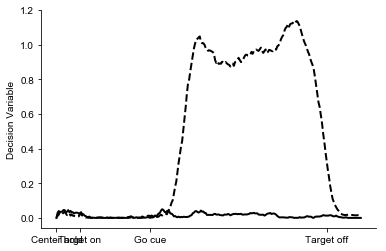

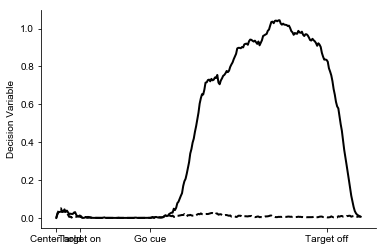

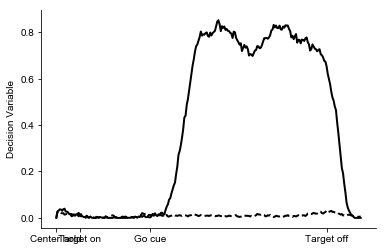

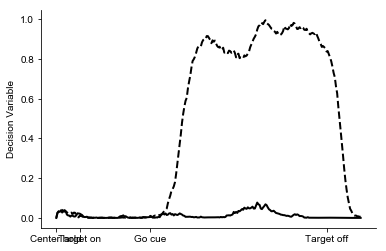

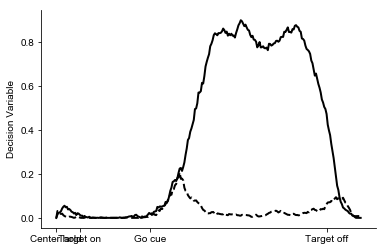

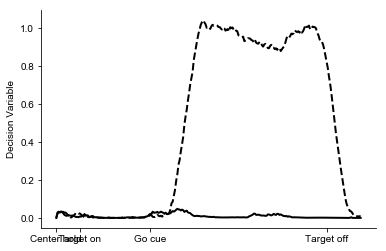

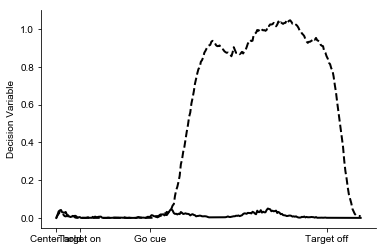

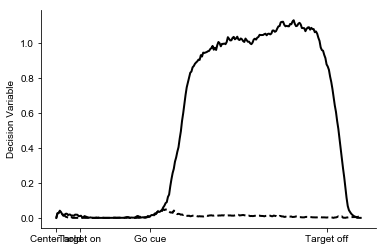

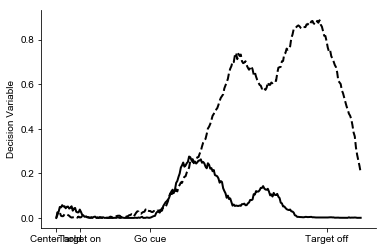

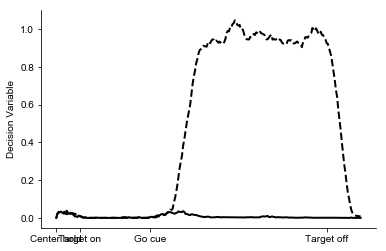

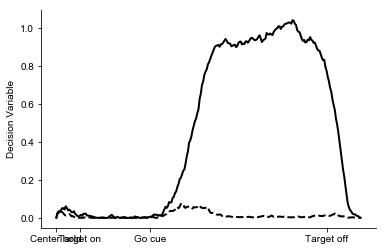

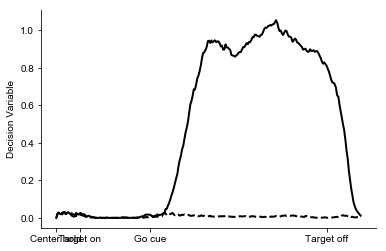

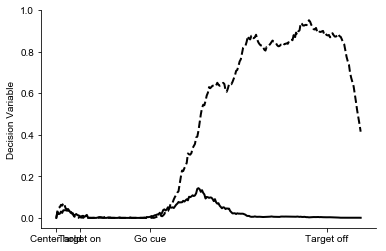

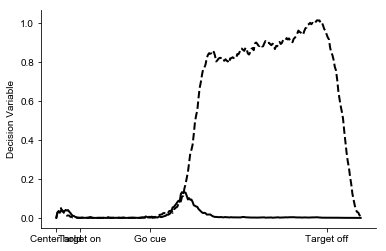

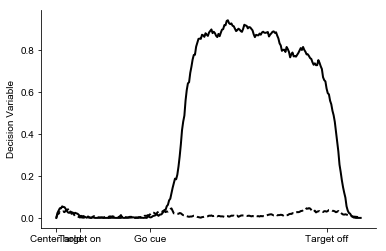

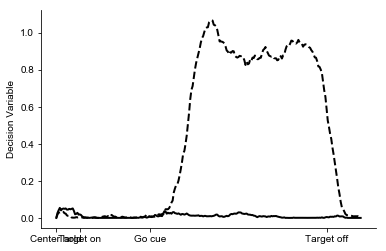

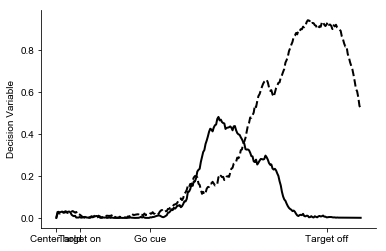

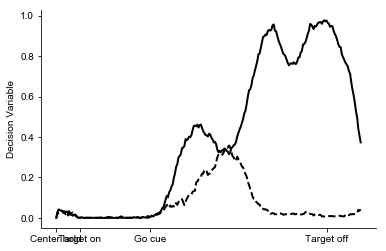

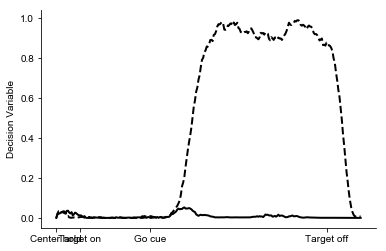

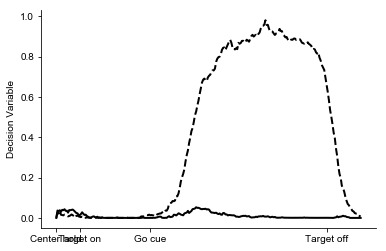

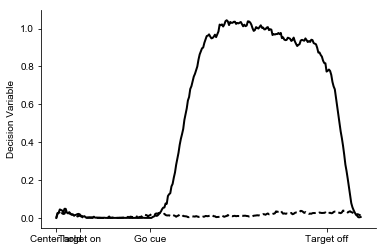

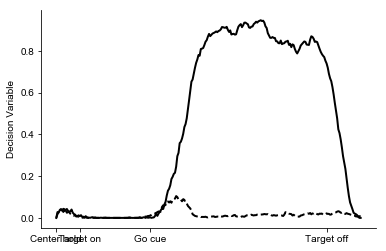

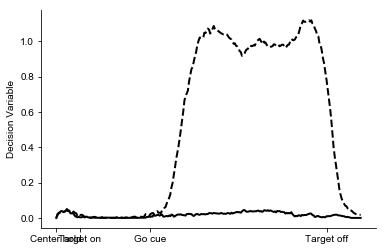

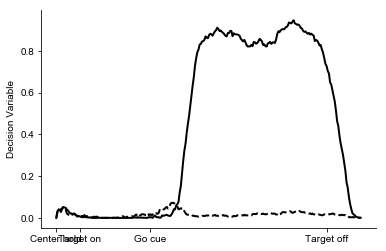

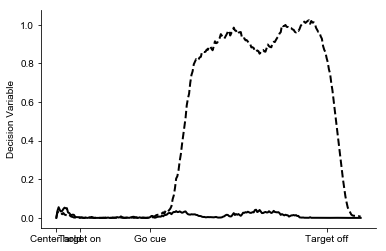

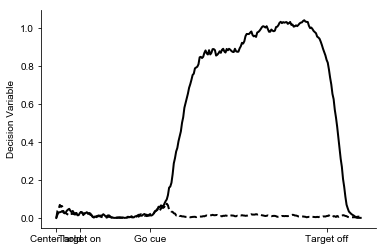

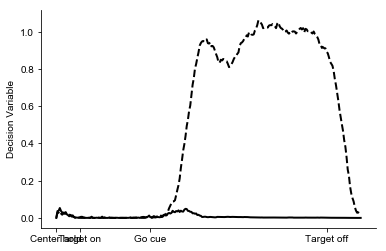

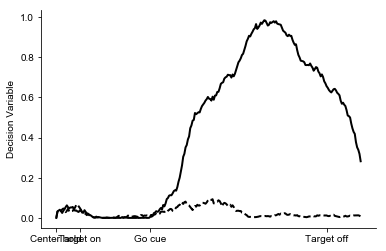

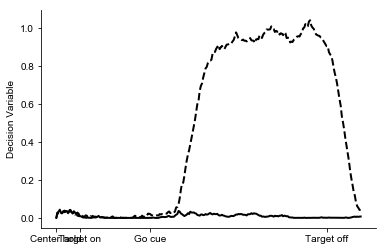

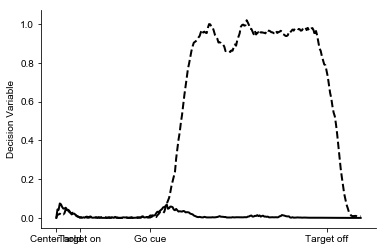

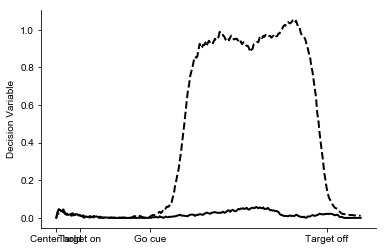

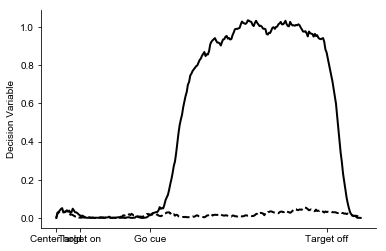

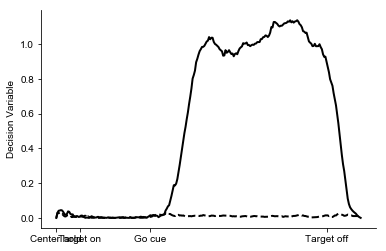

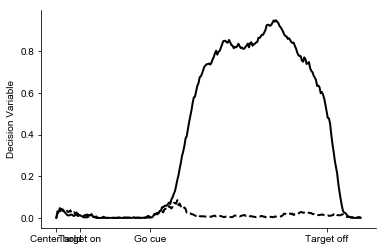

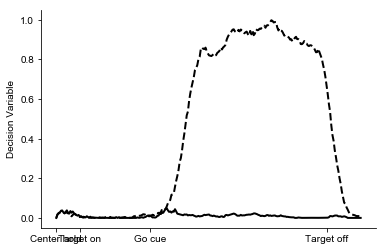

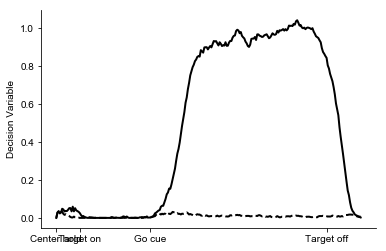

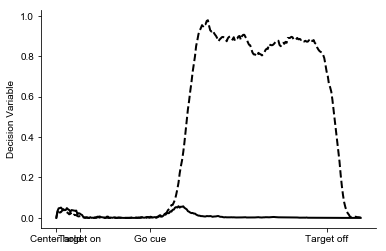

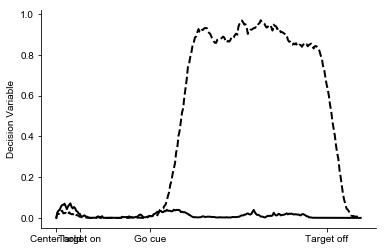

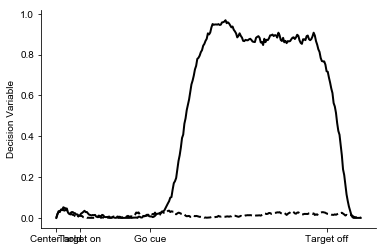

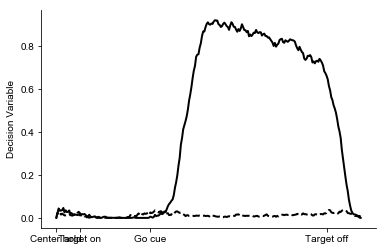

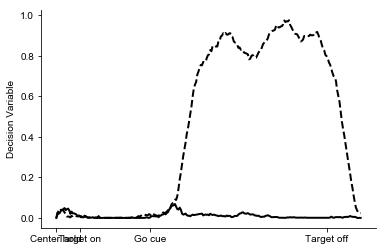

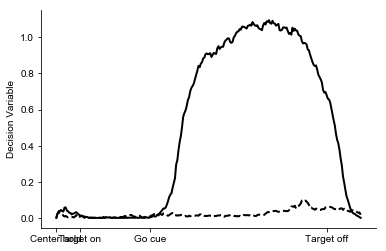

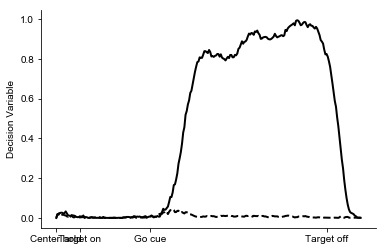

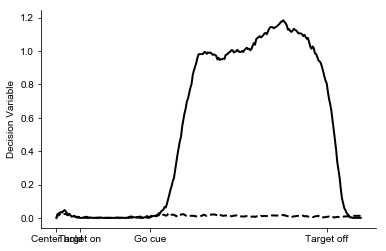

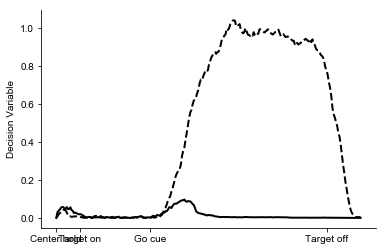

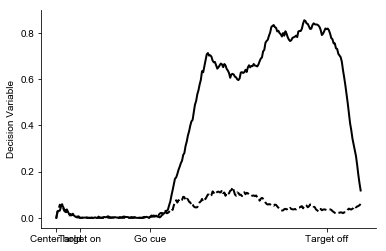

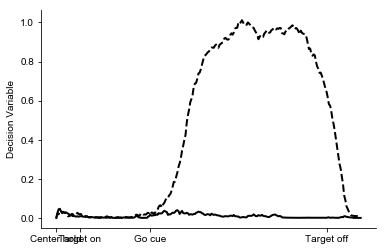

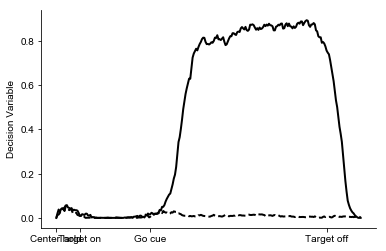

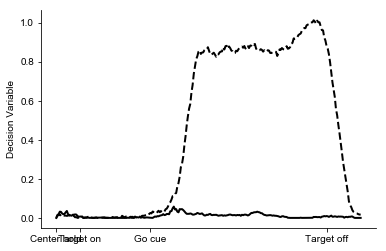

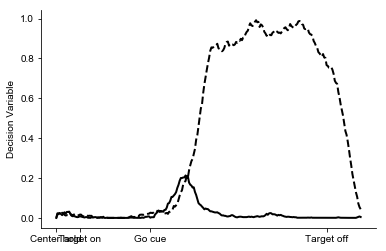

In [45]:
for i in range(50):
    savepath = '/Users/michael/Desktop/forChandScratch/' + filename + '_{}_'.format(str(i))
    trial.plot_outputs_pub(i=i,line_color='black', savepath=savepath)

In [42]:
from pycog.trialRNN import Trial
rnnbase = dirpath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas/'
filename_pkl = '2020-04-10_cb_simple_3areas_seed=7.pkl'
vin = 0.1 ** 2 #0.2**2
var_in = np.array(((0, 0, 0, 0), (0,0,0,0), (0,0,vin,0), (0,0,0,vin)))#0.20**2
var_rec = 0.05 ** 2 #0.1**2 #0.05
nt = 20
trial = Trial(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, threshold=0.6)
filename = filename_pkl[:-4]  # to remove the .pkl

[ pycog.rnn.RNN ] 16500 updates, best error = 0.20798652, spectral radius = 1.84214282
 Trial 560/560: left_right: -1, cond: 158
The proportion of NaN RTs is 0.0


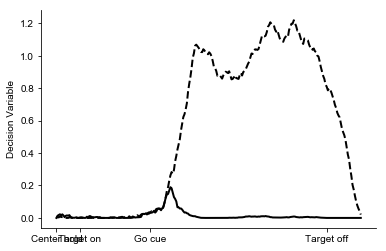

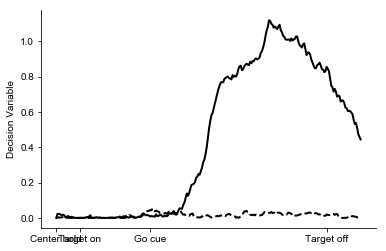

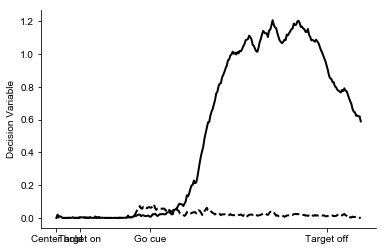

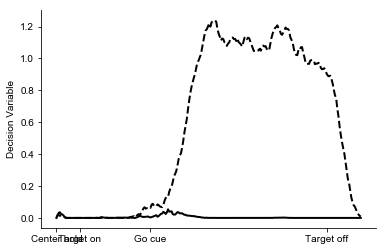

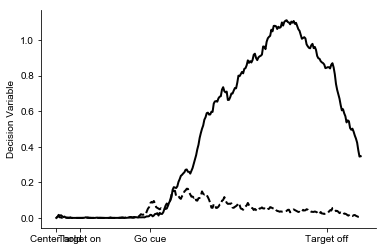

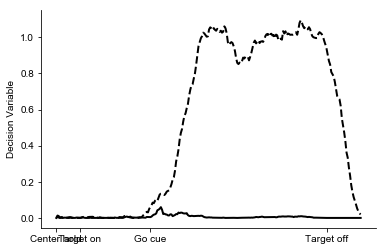

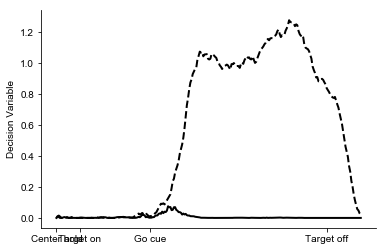

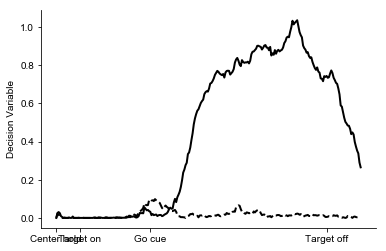

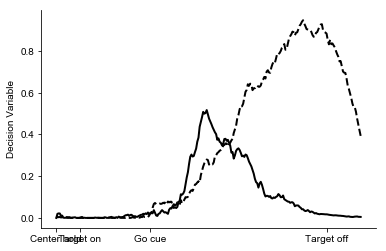

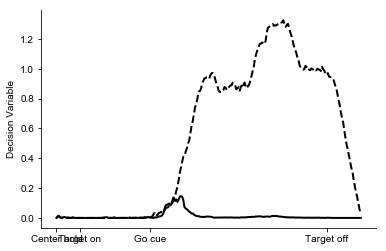

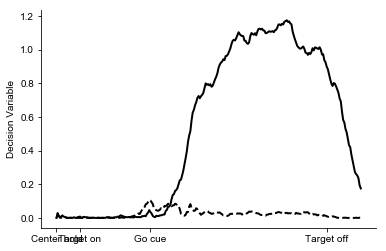

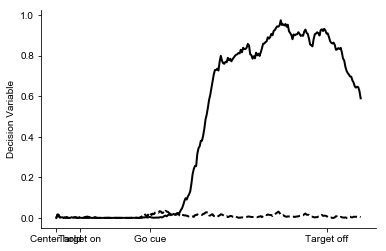

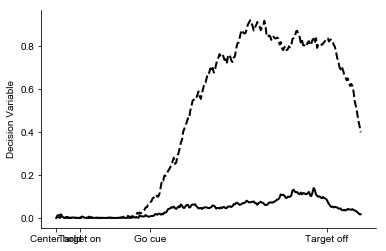

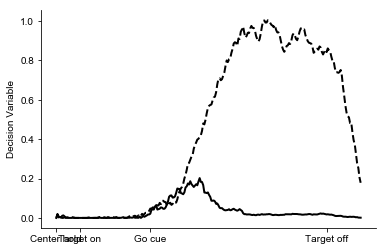

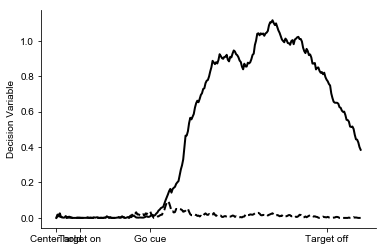

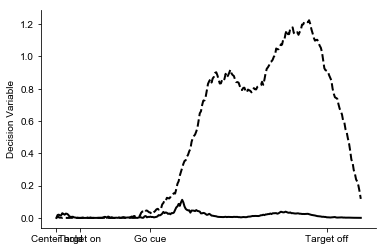

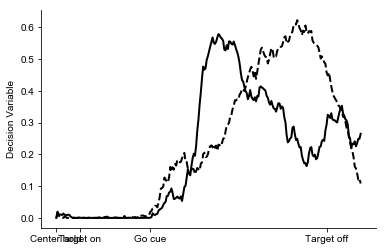

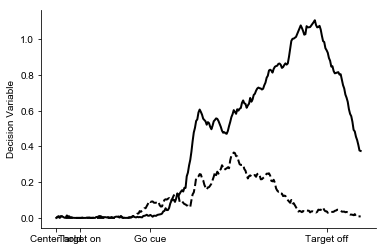

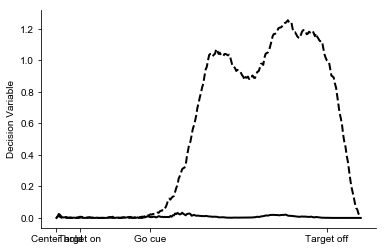

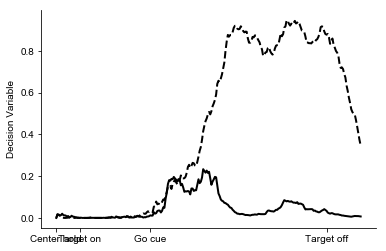

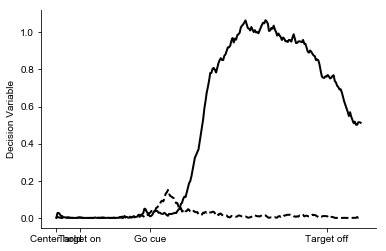

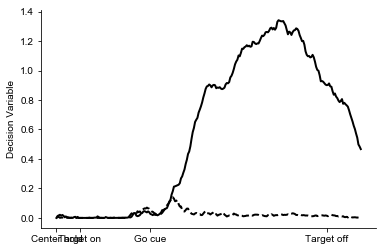

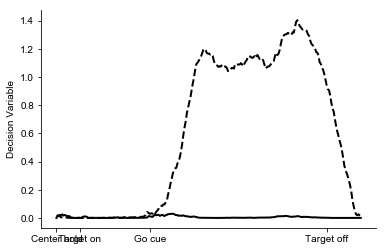

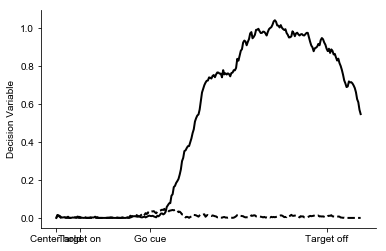

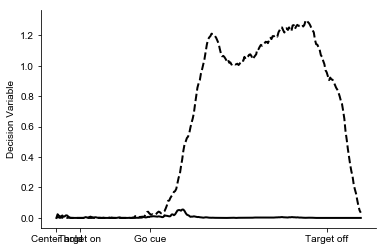

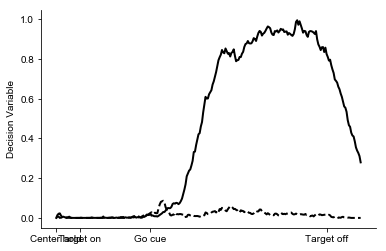

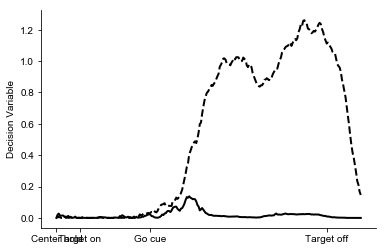

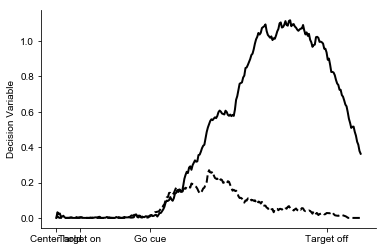

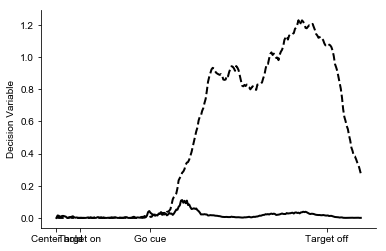

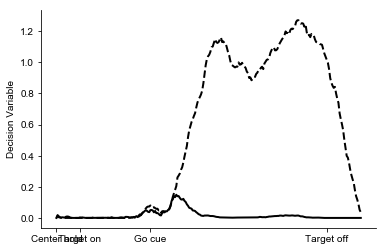

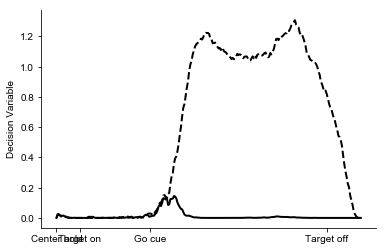

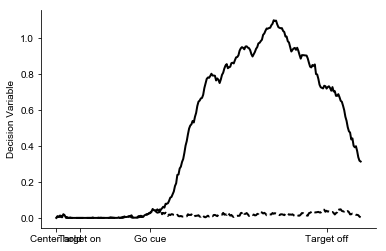

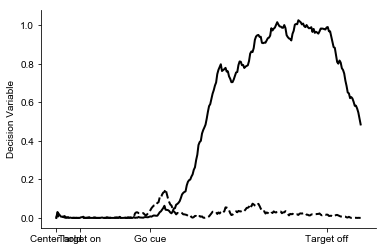

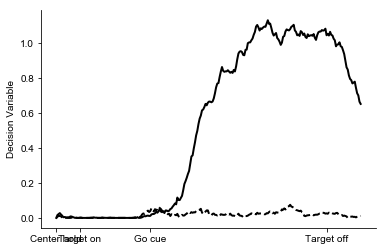

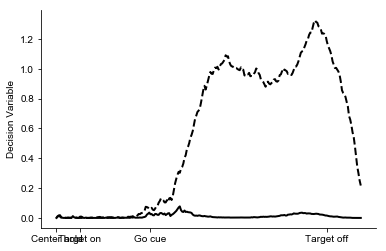

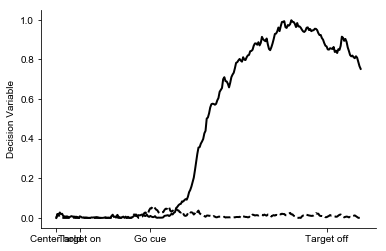

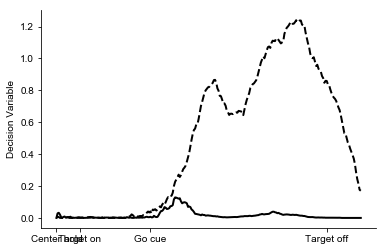

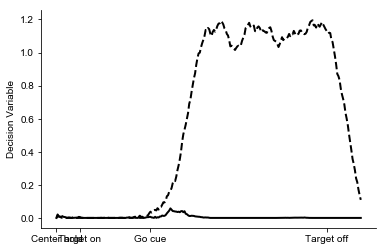

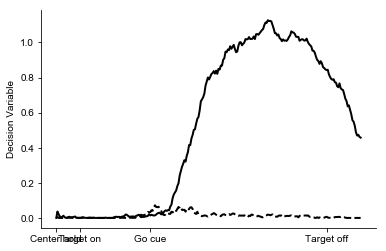

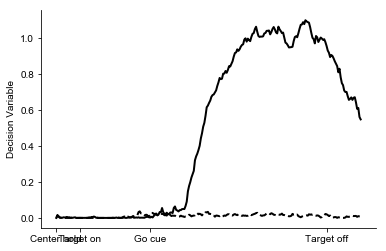

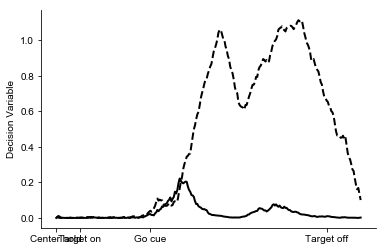

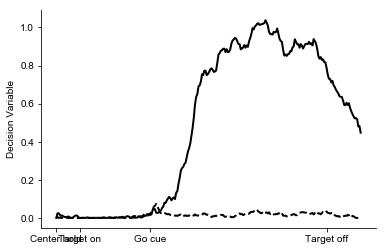

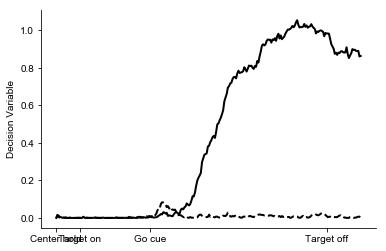

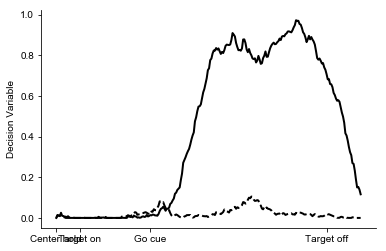

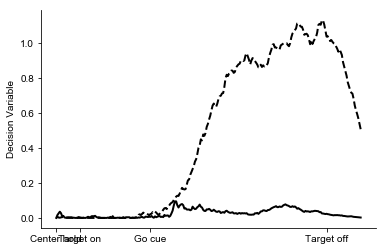

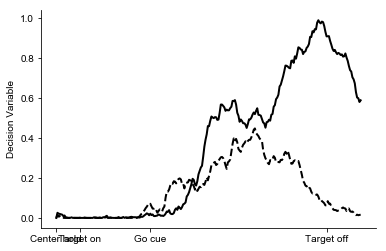

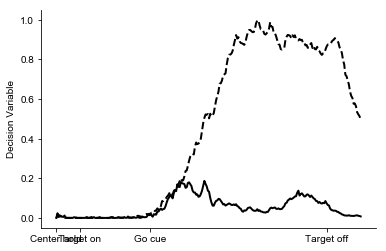

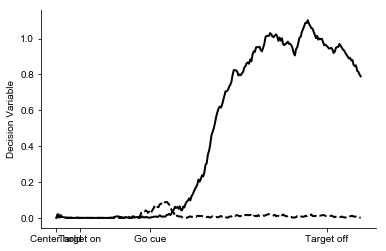

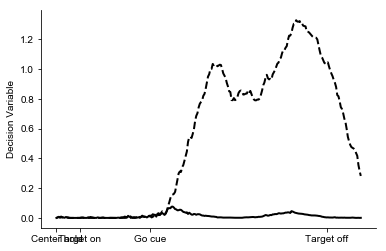

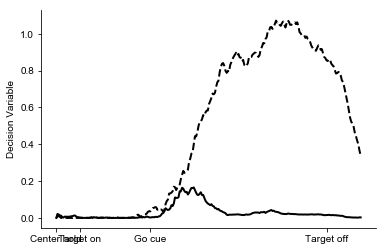

In [43]:
for i in range(50):
    savepath = '/Users/michael/Desktop/forChandScratch/' + filename + '_{}_'.format(str(i))
    trial.plot_outputs_pub(i=i,line_color='black', savepath=savepath)

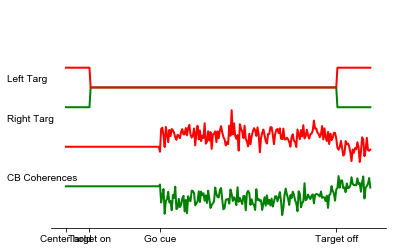

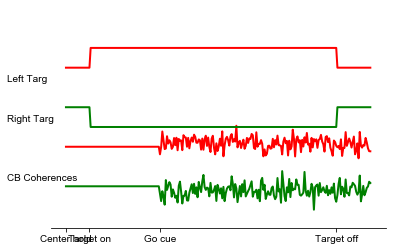

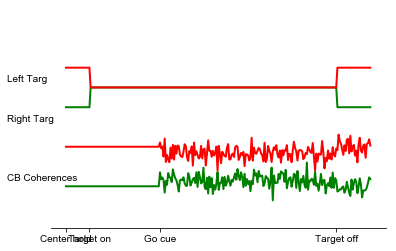

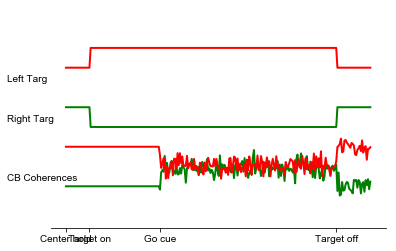

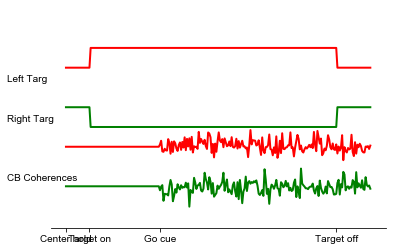

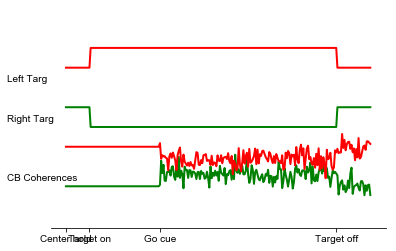

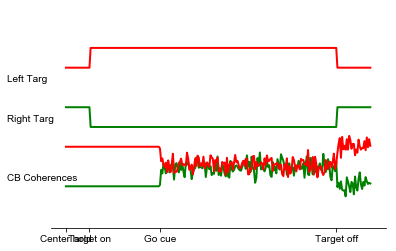

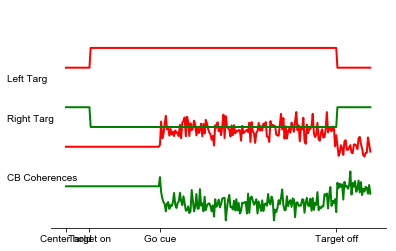

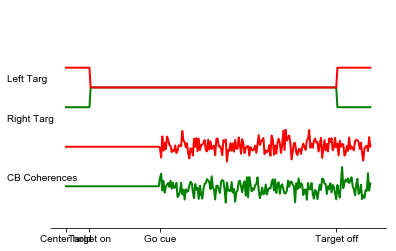

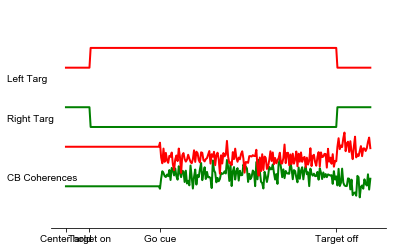

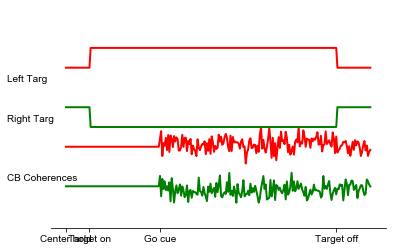

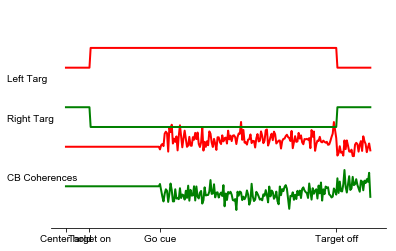

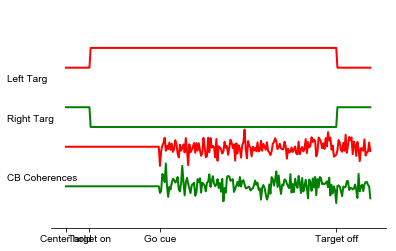

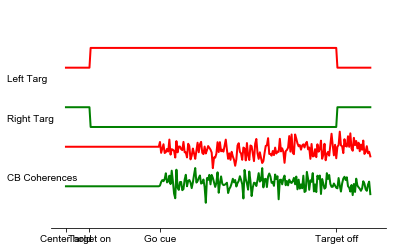

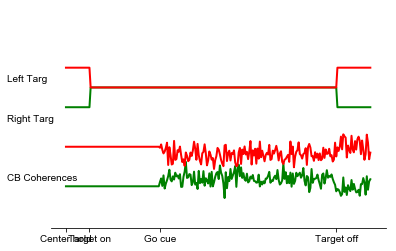

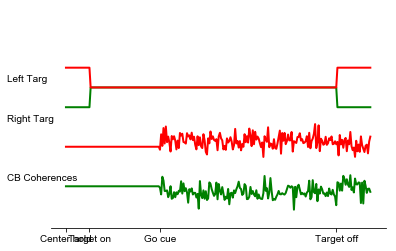

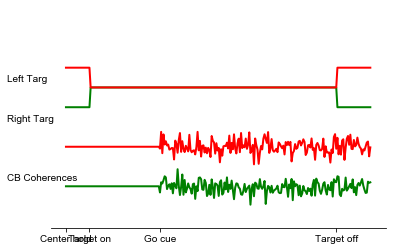

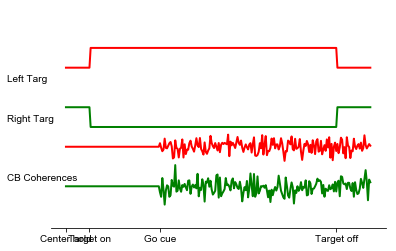

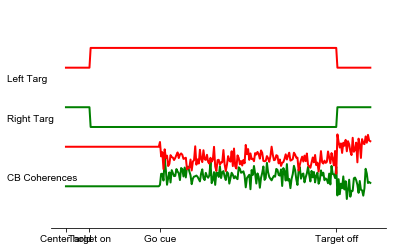

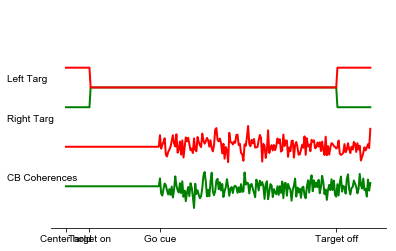

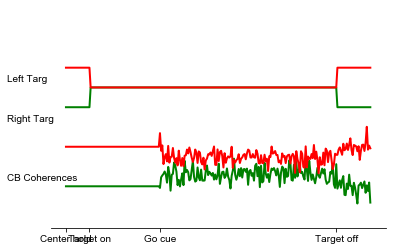

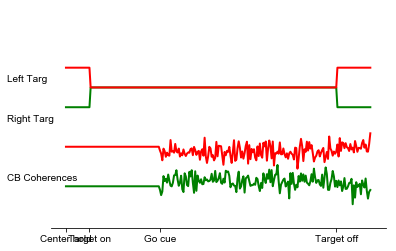

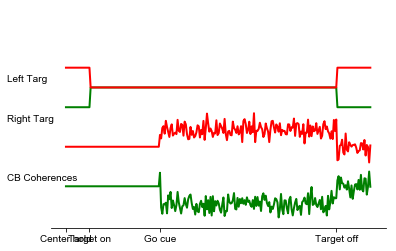

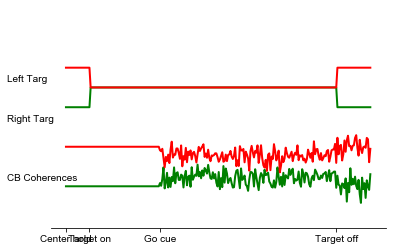

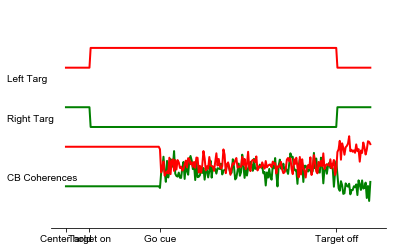

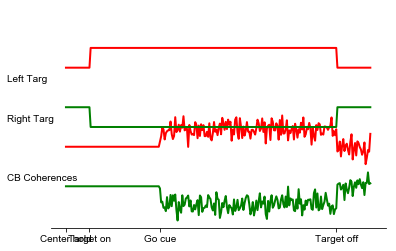

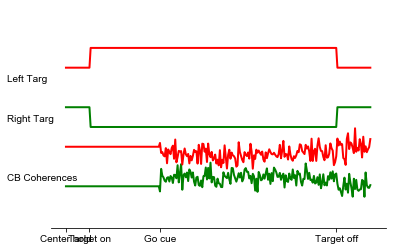

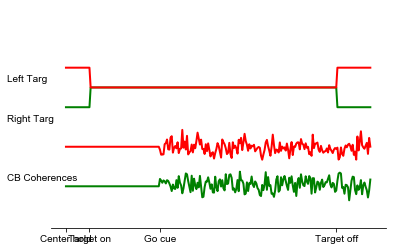

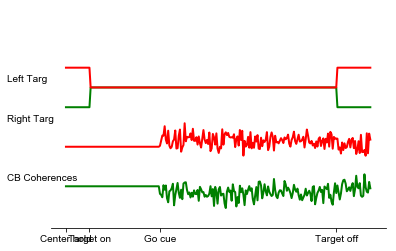

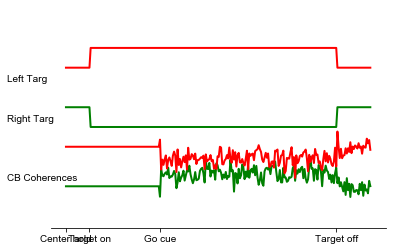

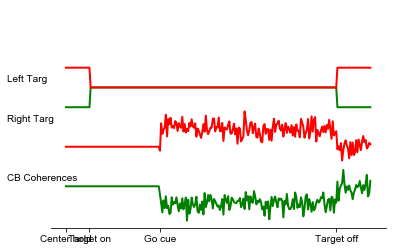

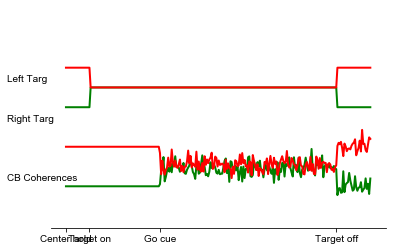

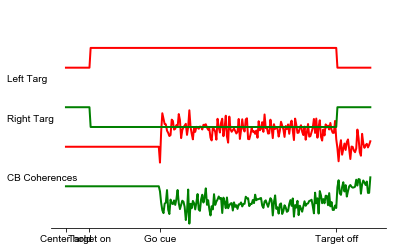

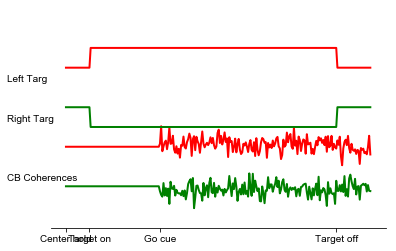

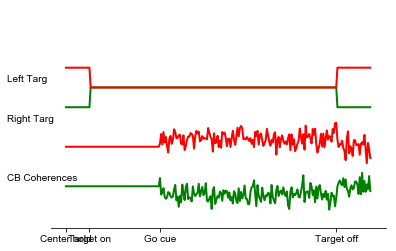

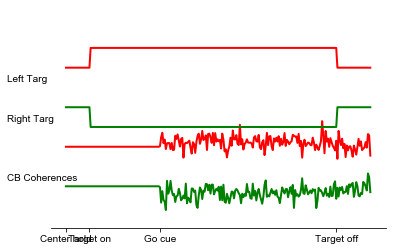

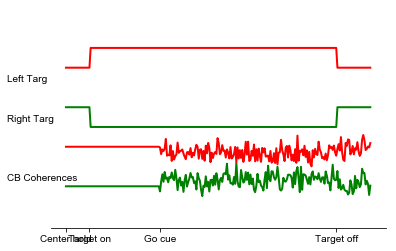

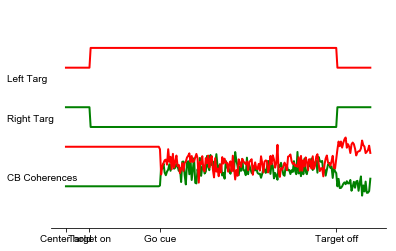

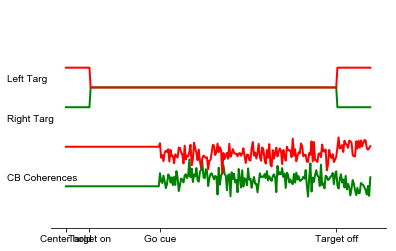

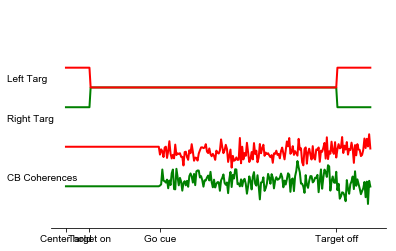

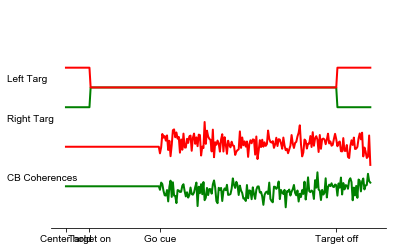

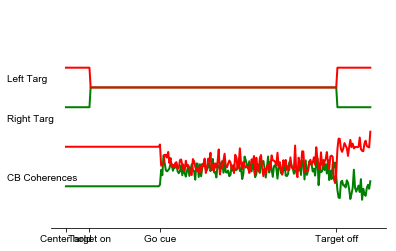

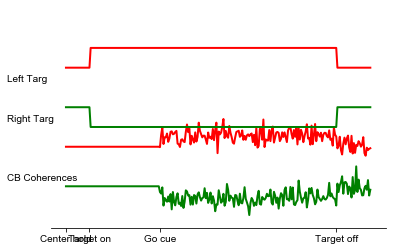

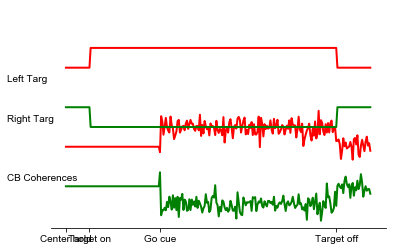

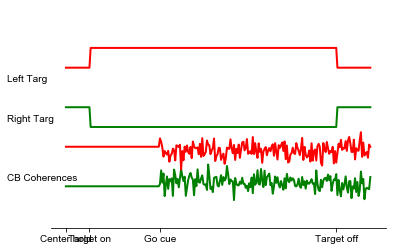

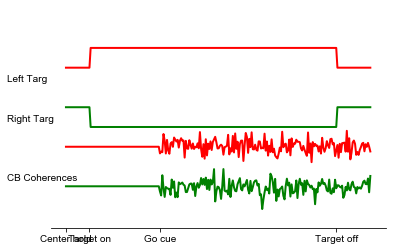

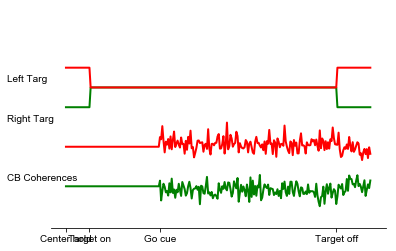

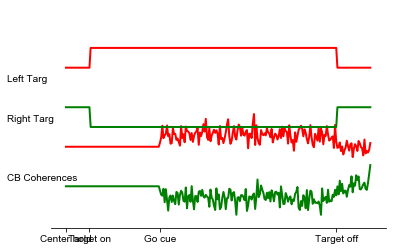

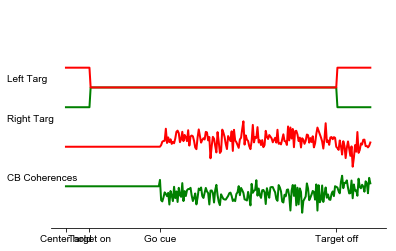

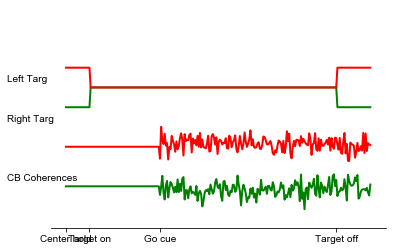

In [46]:
for i in range(50):
    savepath = '/Users/michael/Desktop/forChandScratch/' + filename + '_{}_'.format(str(i))
#     trial.plot_outputs_pub(i=i,line_color='black', savepath=savepath)
    trial.plot_inputs_pub(i=i, savepath=savepath)

In [36]:
acc_color = []
dirpath = "/Users/michael/Documents/GitHub/multi-area-cleaned/"
loadpath_exemplar_mi = dirpath + "sims/revision/exemplar_new/scratch_data_mi/"
acc_color.append(np.load(loadpath_exemplar_mi + '2020-04-10_cb_simple_3areas_nodale_ff=0p1_outputpos_lambdaw=1_acc_color.npy'))


In [37]:
acc_color

[array([0.9961741 , 0.99185044, 0.98754787, 0.98754787, 0.99379176,
        0.99232614, 0.98590177, 0.99665868])]

In [47]:
trial.rnn.bout

array([0., 0.], dtype=float32)

# Playing around with noise

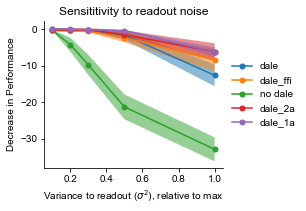

In [46]:
# noise_scale = 0.2
results_list = {}
std_results_list = {}
for noise_scale in [0.1, 0.2, 0.3, 0.5, 1]: #, 1]: #, 0.3, 0.5, 1]: # 0.1 0.2 0.3
    nt = 5 #20
    n_monte = 5 #10
#     fname_log = 'logs/computational_advantage_relativeNoise{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
#     fname_log = 'logs/nov3/computational_advantage_relativeNoiseNonZero{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname_log = 'logs/nov3/computational_advantage_0p25NoiseNonZero{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    #     fname_log = 'logs/computational_advantage_relativeNoiseNonzero{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname = dirpath + fname_log
    logged_data = np.load(fname)
    mean_list, std_list = append_data(logged_data)
    results_list[noise_scale] = mean_list
    std_results_list[noise_scale] = std_list

results_perturb = [] # np.zeros((5, 6))
results_no_perturb = []
std_perturb = []
conds_perturbed = ['dale_perturb_perf', 'ffi_perturb_perf', 'nodale_perturb_perf', 'dale_2a_perturb_perf', 'dale_1a_perturb_perf']
conds_no_perturbed = ['dale_no_perturb_perf', 'ffi_no_perturb_perf', 'nodale_no_perturb_perf', 'dale_2a_no_perturb_perf', 'dale_1a_no_perturb_perf']

for noise in (sorted(results_list)):
    results_new_temp = [results_list[noise][cond] for cond in conds_no_perturbed]
    results_no_perturb.append(results_new_temp)
    
for noise in (sorted(results_list)):
    results_new_temp = [results_list[noise][cond] for cond in conds_perturbed]
    results_perturb.append(results_new_temp)
    std_temp = [std_results_list[noise][cond] for cond in conds_perturbed]
    std_perturb.append(std_temp)

# Make plot
plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
results_new = np.array(results_perturb) - np.array(results_no_perturb)
yerr = np.array(std_perturb)
labels = ['dale', 'dale_ffi', 'no dale', 'dale_2a', 'dale_1a']
for j, label in enumerate(labels):
    plt.plot(sorted(results_list), results_new[:, j], marker='o', markersize=5, label=label)
    plt.fill_between(sorted(results_list), results_new[:, j] - yerr[:, j],
                     results_new[:, j] + yerr[:, j], alpha = 0.5)
plt.xlabel('Variance to readout ($\sigma^2$), relative to max')
plt.ylabel('Decrease in Performance')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.title('Sensititivity to readout noise')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/comp_advanatge_nonzeroNoiseFixed0p25Nov3.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')    

# print(results_list)
# print(std_list)